# FINAL NPxZxD PROTOTYPE

In [1]:
from IPython.display import Image
#Image(filename=('NPxZxDslab_schematics.png'), width=500)

In [2]:
import numpy as np
# to check for array handling errors:
#np.warnings.filterwarnings('error', category=np.VisibleDeprecationWarning)

import matplotlib.pyplot as plt

# Parameter helping functions (Size Arrays & Allometries)

In [3]:
PZ_num = 10

phyto_init = np.tile(.01, (PZ_num))

zoo_init = np.tile(.005, (PZ_num))

In [4]:
def calculate_sizes(size_min, size_max, num):
    """initializes log spaced array of sizes from ESD size range"""
    numbers = np.array([i for i in range(num)])
    sizes = (np.log(size_max) - np.log(size_min))* numbers / (num-1) + np.log(size_min)
    return np.exp(sizes)

In [5]:
phyto_sizes = calculate_sizes(1,20,PZ_num)
phyto_sizes

array([ 1.        ,  1.39495079,  1.94588772,  2.71441762,  3.78647901,
        5.2819519 ,  7.368063  , 10.27808533, 14.33742329, 20.        ])

In [6]:
zoo_sizes = calculate_sizes(2.16,280,PZ_num)
zoo_sizes

array([  2.16      ,   3.70850331,   6.36712815,  10.9317203 ,
        18.7686671 ,  32.22391856,  55.3252355 ,  94.98787921,
       163.08465954, 280.        ])

In [7]:
def calculate_zoo_I0(sizes):
    """initializes allometric parameters based on array of sizes (ESD)"""
    return 26 * sizes ** -0.4 #* .5

zoo_I0 = calculate_zoo_I0(zoo_sizes)
zoo_I0

array([19.10697113, 15.39195835, 12.39926413,  9.9884464 ,  8.04636956,
        6.48189524,  5.22160529,  4.20635644,  3.38850479,  2.72966993])

In [8]:
def calculate_phyto_mu0(sizes):
    """initializes allometric parameters based on array of sizes (ESD)
    allometric relationships are taken from meta-analyses of lab data"""
    return 2.6 * sizes ** -0.45
    
phyto_mu0 = calculate_phyto_mu0(phyto_sizes)
phyto_mu0

array([2.6       , 2.23831831, 1.92694957, 1.65889481, 1.42812871,
       1.22946409, 1.05843538, 0.91119819, 0.78444292, 0.67532037])

In [9]:
def calculate_phyto_ks(sizes):
    return sizes * .1

phyto_ks = calculate_phyto_ks(phyto_sizes)
phyto_ks

array([0.1       , 0.13949508, 0.19458877, 0.27144176, 0.3786479 ,
       0.52819519, 0.7368063 , 1.02780853, 1.43374233, 2.        ])

In [10]:
def init_phiP(phytosize, preyoptsize):
    """creates array of feeding preferences [P...P10] for each [Z]"""
    phiP = np.array([[np.exp(-((np.log10(xpreyi) - np.log10(xpreyoptj)) / 0.25) ** 2)
                      for xpreyi in phytosize] for xpreyoptj in preyoptsize])
    return phiP

phiP = init_phiP(phyto_sizes, phyto_sizes)
phiP

array([[1.00000000e+00, 7.15798658e-01, 2.62520679e-01, 4.93307727e-02,
        4.74956764e-03, 2.34299842e-04, 5.92204460e-06, 7.66925382e-08,
        5.08881085e-10, 1.73006040e-12],
       [7.15798658e-01, 1.00000000e+00, 7.15798658e-01, 2.62520679e-01,
        4.93307727e-02, 4.74956764e-03, 2.34299842e-04, 5.92204460e-06,
        7.66925382e-08, 5.08881085e-10],
       [2.62520679e-01, 7.15798658e-01, 1.00000000e+00, 7.15798658e-01,
        2.62520679e-01, 4.93307727e-02, 4.74956764e-03, 2.34299842e-04,
        5.92204460e-06, 7.66925382e-08],
       [4.93307727e-02, 2.62520679e-01, 7.15798658e-01, 1.00000000e+00,
        7.15798658e-01, 2.62520679e-01, 4.93307727e-02, 4.74956764e-03,
        2.34299842e-04, 5.92204460e-06],
       [4.74956764e-03, 4.93307727e-02, 2.62520679e-01, 7.15798658e-01,
        1.00000000e+00, 7.15798658e-01, 2.62520679e-01, 4.93307727e-02,
        4.74956764e-03, 2.34299842e-04],
       [2.34299842e-04, 4.74956764e-03, 4.93307727e-02, 2.62520679e-01,
   

# Model building

In [11]:
import xso

In [12]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '../src/'))

import phydra

In [13]:
from phydra.models import NPxZxSizeBased

In [14]:
NPxZxSizeBased

<xsimlab.Model (13 processes, 33 inputs)>
Core
    solver_type              [in] solver type to use for model
Time
    time_input               [in] ('time',) sequence of time for wh...
Nutrient
    var_label                [in] label / basic state variable
    var_init                 [in] initial value / basic state variable
Phytoplankton
    biomass_label            [in] label / phytoplankton biomass
    biomass_init             [in] ('phyto',) initial value / phytop...
    phyto_index              [in] ('phyto',) index / size spectrum ...
Zooplankton
    biomass_label            [in] label / zooplankton biomass
    biomass_init             [in] ('zoo',) initial value / zooplank...
    zoo_index                [in] ('zoo',) index / size spectrum of...
N0
    forcing_label            [in] label / external nutrient
    value                    [in] parameter / constant value
Inflow
    var                      [in] label reference / variable affect...
    forcing                  [in]

In [15]:
import numpy as np
np.arange(0,365*3)

array([   0,    1,    2, ..., 1092, 1093, 1094])

In [16]:
import numpy as np
odeint_setup = xso.setup('odeint', NPxZxSizeBased,
            time=np.arange(0,365*3),  # *365
            input_vars={
                    # State variables
                    'Nutrient':{'var_label':'N','var_init':1.},
                    'Phytoplankton':{'biomass_label':'P','biomass_init':phyto_init, 'phyto_index':phyto_sizes},
                    'Zooplankton':{'biomass_label':'Z','biomass_init':zoo_init, 'zoo_index': zoo_sizes},
                
                    # Flows:
                    'Inflow':{'forcing':'N0', 'rate':1., 'var':'N'},
                
                    # Growth
                    'Growth':{'resource':'N', 'consumer':'P', 'halfsat':phyto_ks, 'mu_max':phyto_mu0},

                    # Grazing
                    'Grazing':{'resource':'P', 'consumer':'Z',
                               'Imax':zoo_I0, 'KsZ':3, 'phiP':phiP},
                    'GGE':{'grazed_resource':'P', 'assimilated_consumer':'Z', 'egested_detritus':'N', 
                           'epsilon':0.33, 'f_eg':0.33},
                
                    # Mortality
                    'PhytoMortality':{'var':'P', 'rate':0.1*phyto_mu0},
                    'ZooMortality':{'var':'Z', 'rate':1.},

                    # Forcings
                    'N0':{'forcing_label':'N0', 'value':1.},
            })

In [17]:
odeint_setup

<xarray.Dataset>
Dimensions:                       (clock: 2, phyto: 10, zoo: 10, time: 1095)
Coordinates:
  * clock                         (clock) int64 0 1
Dimensions without coordinates: phyto, zoo, time
Data variables: (12/33)
    Nutrient__var_label           <U1 'N'
    Nutrient__var_init            float64 1.0
    Phytoplankton__biomass_label  <U1 'P'
    Phytoplankton__biomass_init   (phyto) float64 0.01 0.01 0.01 ... 0.01 0.01
    Phytoplankton__phyto_index    (phyto) float64 1.0 1.395 1.946 ... 14.34 20.0
    Zooplankton__biomass_label    <U1 'Z'
    ...                            ...
    ZooMortality__var             <U1 'Z'
    ZooMortality__rate            float64 1.0
    N0__forcing_label             <U2 'N0'
    N0__value                     float64 1.0
    Core__solver_type             <U6 'odeint'
    Time__time_input              (time) int64 0 1 2 3 4 ... 1091 1092 1093 1094
Attributes:
    __xsimlab_output_vars__:  Nutrient__var,Phytoplankton__biomass,Zooplankto...

In [18]:
from xsimlab.monitoring import ProgressBar

with ProgressBar():
    odeint_out = odeint_setup.xsimlab.run(model=NPxZxSizeBased)

             0% | initialize 

In [20]:
odeint_out

<xarray.Dataset>
Dimensions:                       (zoo: 10, time: 1095, phyto: 10, clock: 2)
Coordinates:
  * clock                         (clock) int64 0 1
  * phyto                         (phyto) float64 1.0 1.395 1.946 ... 14.34 20.0
  * time                          (time) float64 0.0 1.0 ... 1.093e+03 1.094e+03
  * zoo                           (zoo) float64 2.16 3.709 6.367 ... 163.1 280.0
Data variables: (12/45)
    Core__solver_type             <U6 'odeint'
    GGE__assimilated_consumer     <U1 'Z'
    GGE__assimilation_value       (zoo, time) float64 0.0006335 ... 0.0
    GGE__egested_detritus         <U1 'N'
    GGE__egestion_value           (time) float64 0.002788 0.002788 ... 0.2643
    GGE__epsilon                  float64 0.33
    ...                            ...
    ZooMortality__rate            float64 1.0
    ZooMortality__var             <U1 'Z'
    Zooplankton__biomass          (zoo, time) float64 0.005 ... 2.864e-131
    Zooplankton__biomass_init     (zoo) float64 0.005 0.005 ... 0.005 0.005
    Zooplankton__biomass_label    <U1 'Z'
    Zooplankton__zoo_index        (zoo) float64 2.16 3.709 6.367 ... 163.1 280.0

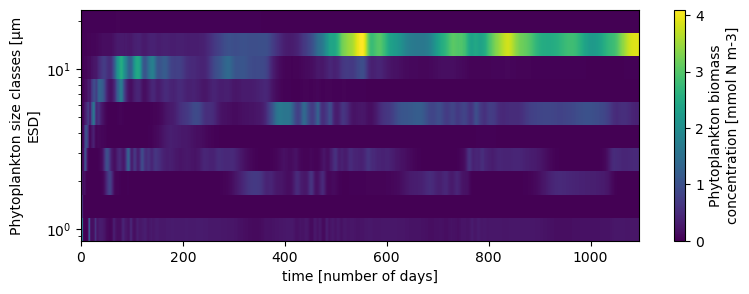

In [21]:
odeint_out.Phytoplankton__biomass.plot(yscale='log', aspect=3, size=3)

In [25]:
plt.rcParams['figure.figsize'] = [20, 5]

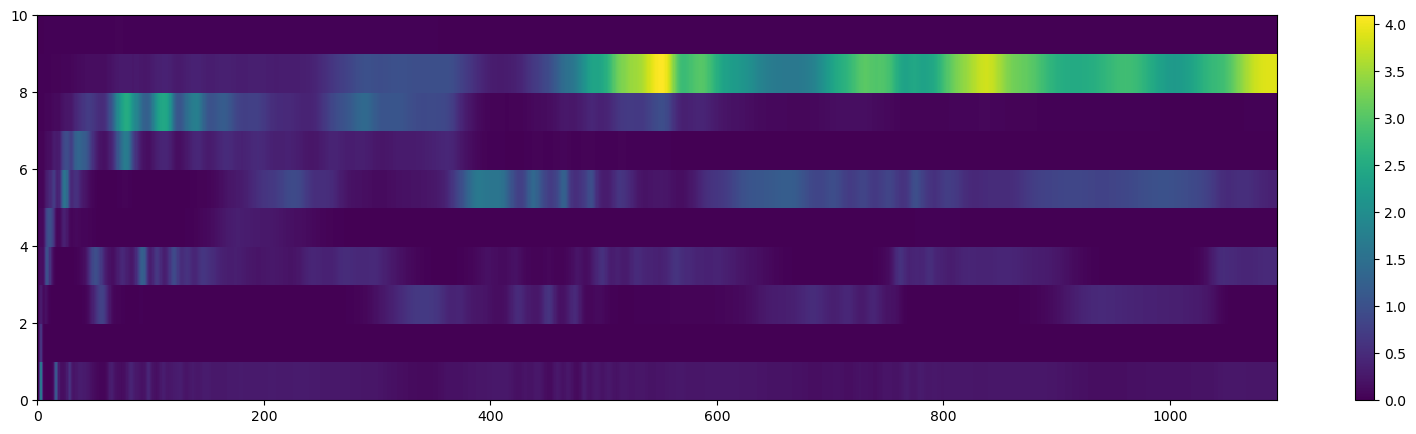

In [31]:
plt.pcolor(odeint_out.Phytoplankton__var_value)
plt.colorbar()

#plt.savefig('ASTroCAT_PZ_200_P.pdf', bbox_inches='tight')
plt.show()

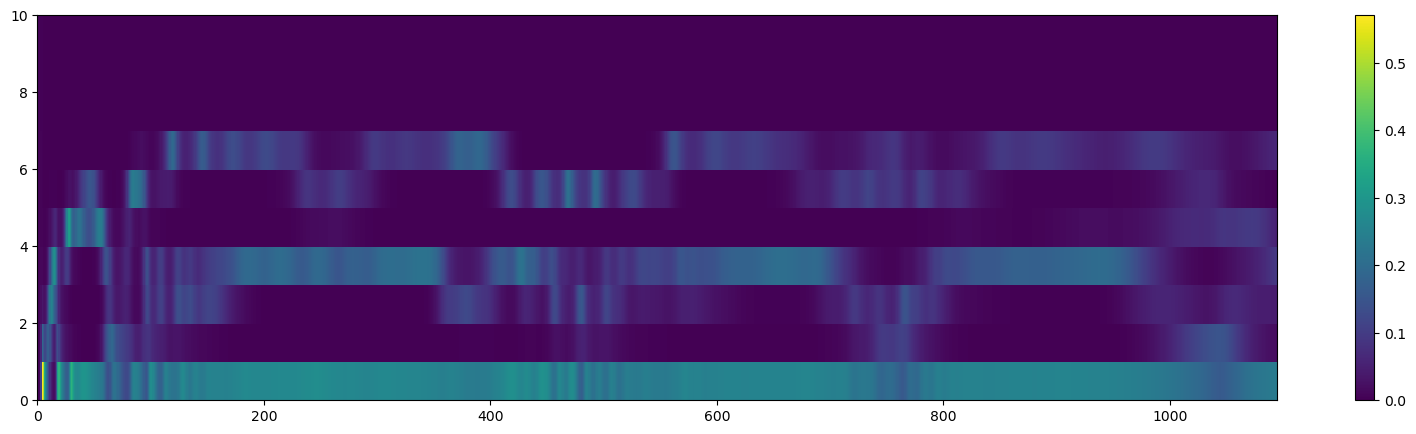

In [32]:
plt.pcolor(odeint_out.Zooplankton__var_value)
plt.colorbar()

plt.savefig('ASTroCAT_PZ_200_Z.pdf', bbox_inches='tight')
plt.show()

NameError: name 'P_out' is not defined

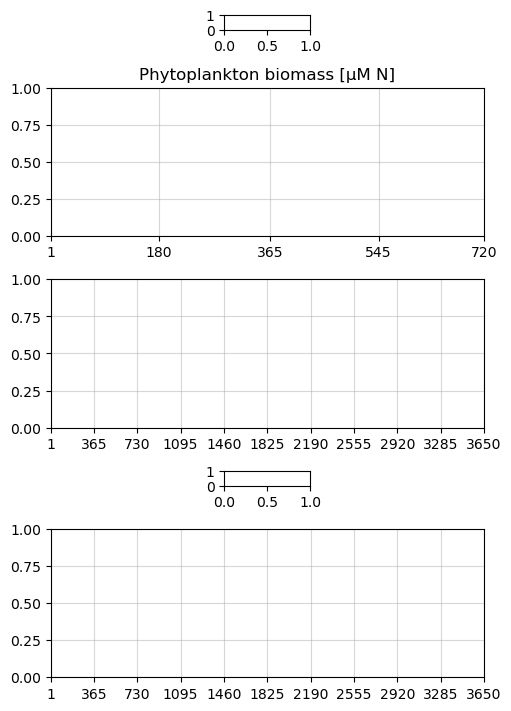

In [33]:
plt.rcParams['figure.figsize'] = [5, 7]

#f1, (ax1col, ax1, ax2, ax2col, ax3) = plt.subplots(5, 3, gridspec_kw={'height_ratios': [.1,1,1,.1,1]})#, sharey='row')

fig = plt.figure(constrained_layout=True)

gs = fig.add_gridspec(nrows=5, ncols=3,
                        hspace=0.1, wspace=0.1, height_ratios=[.1,1,1,.1,1])

ax1col = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0:3])
ax2 = fig.add_subplot(gs[2, 0:3])
ax3col = fig.add_subplot(gs[3, 1])
ax3 = fig.add_subplot(gs[4, 0:3])


plt.setp(ax1, xticks=[1,180,365,365+180,720])
from matplotlib.ticker import MaxNLocator
for axe in [ax1]:
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        #axe.tick_params(top=False, right=True, direction="in")

plt.setp((ax2, ax3), xticks=[1,365,2*365,3*365,4*365,5*365,6*365,7*365,8*365,9*365,10*365])
from matplotlib.ticker import MaxNLocator
for axe in (ax2, ax3):  
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        #axe.tick_params(top=False, right=True, direction="in")
        
ax1.set_title('Phytoplankton biomass [µM N]')
ax1plt = ax1.pcolormesh(P_out.time[:365*2*resolution:resmpl_step],P_out.P__sizes,
               P_out.env__stateout[:365*2*resolution:resmpl_step].T, linewidth=0,rasterized=True)
ax1plt
ax1.set_yscale('log')
ax1.set_yticks([1,2,5,10,20])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax1plt,cax=ax1col, orientation='horizontal')
ax1.set_ylabel('Phytoplankton ESD [µm]')
ax1.set_xlabel('Time [days]')
    
ax2.pcolormesh(P_out.time[::resolution],P_out.P__sizes,P_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax2.set_yscale('log')
ax2.set_yticks([1,2,5,10,20])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_ylabel('Phytoplankton ESD [µm]')
ax2.set_xlabel('Time [years]')
ax2.set_xticklabels(labels=[i for i in range(1,11)])

ax3.set_title('Zooplankton biomass [µM N]')
ax3plt = ax3.pcolormesh(Z_out.time[::resolution],Z_out.Z__sizes,Z_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax3plt
ax3.set_yscale('log')
ax3.set_yticks([3,5,10,20,50,100,200,400])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax3plt, cax=ax3col, orientation='horizontal')
ax3.set_ylabel('Zooplankton ESD [µm]')
ax3.set_xlabel('Time [years]')
ax3.set_xticklabels(labels=[i for i in range(1,11)])

# Defining custom 'xlim' and 'ylim' values.
xlim = (0, 365*9+364)

# Setting the values for all axes.
plt.setp((ax2, ax3), xlim=xlim)

#f1.align_ylabels()


#plt.savefig('../03_chemostat.pdf', bbox_inches='tight')
plt.show()

In [ ]:
time = odeint_out.Time__time

plt.plot(time, odeint_out.MLD__forcing_value, label='MLD')
plt.ylim(bottom=0)
plt.legend()
plt.show()

plt.plot(time, odeint_out.MLDderiv__forcing_value, label='MLDderiv')
plt.legend()
plt.show()

plt.plot(time, odeint_out.I0__forcing_value, label='I0')
plt.plot(time, odeint_out.N0__forcing_value, label='N0')
plt.plot(time, odeint_out.Tmld__forcing_value, label='Tmld')
plt.ylim(bottom=0)
plt.legend()

In [ ]:
time = odeint_out.Time__time
plt.plot(time, odeint_out.Nutrient__var_value, label='N')
plt.ylim(bottom=0)
plt.legend()

In [ ]:
time = odeint_out.Time__time
plt.plot(time, odeint_out.Nutrient__var_value, label='N')
plt.plot(time, odeint_out.Phytoplankton__var_value.T, label='P')
plt.plot(time, odeint_out.Zooplankton__var_value.T, label='Z')
plt.plot(time, odeint_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

In [ ]:
#plt.plot(time, -odeint_out.PhytoLinMortality__decay_value.T, label='P linear mortality')
#plt.plot(time, -odeint_out.PhytoQuadMortality__decay_value.T, label='P quad mortality')
plt.plot(time, odeint_out.Growth__growth_value.T, label='Phyto growth')

plt.legend()

In [ ]:
plt.plot(time, odeint_out.GGE__grazing_value.T, label="grazing")
plt.legend()

In [ ]:
stepwise_setup = phydra.update_setup(model=NPxZxD, old_setup=odeint_setup, new_solver="stepwise",
                                     new_time=np.arange(0,5*365,.2))

In [ ]:
with NPxZxD:
    stepwise_out = stepwise_setup.xsimlab.run()

In [ ]:
time = stepwise_out.Time__time
plt.plot(time, stepwise_out.Nutrient__var_value, label='N')
plt.plot(time, stepwise_out.Phytoplankton__var_value.T, label='P')
plt.plot(time, stepwise_out.Zooplankton__var_value.T, label='Z')
plt.plot(time, stepwise_out.Detritus__var_value, label='D')
#plt.ylim(bottom=0)
plt.legend()

In [ ]:
plt.plot(time, stepwise_out.GGE__grazing_value.T, label="grazing")
plt.legend()

#stepwise_out.GGE__egestion_value

In [ ]:
plt.plot(time, stepwise_out.GGE__assimilation_value[0,:], label="graze 1")
plt.plot(time, stepwise_out.GGE__assimilation_value[1,:], label="graze 2")
plt.plot(time, stepwise_out.GGE__assimilation_value[2,:], label="graze 3")
plt.legend()

In [ ]:
#plt.plot(time, stepwise_out.GGE__grazed_resource)

In [ ]:
# plt.plot(time, stepwise_out.Input__input_value, label='N_input')
# plt.plot(time, -stepwise_out.PhytoLinMortality__decay_value, label='P mortality')
# plt.plot(time, -stepwise_out.PhytoQuadMortality__decay_value, label='P quad mortality')
# plt.plot(time, stepwise_out.Growth__growth_value, label='N uptake')
plt.plot(time, stepwise_out.Grazing__grazing_value[0,0,:], label='Grazing')
plt.plot(time, stepwise_out.Grazing__grazing_value[1,1,:], label='Grazing1')
plt.plot(time, stepwise_out.Grazing__grazing_value[2,2,:], label='Grazing2')
# plt.ylim(bottom=0)
plt.legend()

In [ ]:
gekko_setup = phydra.update_setup(model=NPxZxD, 
                                  old_setup=odeint_setup, 
                                  new_solver="gekko", 
                                  # gekko solver works better (much faster) with smaller time steps:
                                  # new_time=np.arange(0,201,.1)
                                 )

In [ ]:
with NPxZxD:
    gekko_out = gekko_setup.xsimlab.run()

In [ ]:
gekko_out

In [ ]:
time = gekko_out.Time__time
plt.plot(time, gekko_out.Nutrient__var_value, label='N')
plt.plot(time, gekko_out.Phytoplankton__var_value.T, label='P')
plt.plot(time, gekko_out.Zooplankton__var_value.T, label='Z')
plt.plot(time, gekko_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

In [ ]:
# GEKKO
time = gekko_out.Time__time
#plt.plot(time, gekko_out.Nutrient__var_value, label='N')

plt.plot(time, gekko_out.Upwelling__mixing_value, label='mixing')
plt.plot(time, gekko_out.MLDderiv__forcing_value/100, label='MLDderiv')
#plt.ylim(bottom=0)
plt.legend()

In [ ]:
_dims = ()

In [ ]:
f"{'(' + ','.join(_dims) + ')'}"

In [ ]:
upwelling1 = (gekko_out.N0__forcing_value - gekko_out.Nutrient__var_value) * (np.maximum(gekko_out.MLDderiv__forcing_value, 0) +gekko_out.Upwelling__kappa) /gekko_out.MLD__forcing_value

In [ ]:
plt.plot(time, upwelling1)

In [ ]:
plt.plot(time, np.maximum(gekko_out.MLDderiv__forcing_value, 0) +gekko_out.Upwelling__kappa, label='mixing')

In [ ]:
# ODEINT
plt.plot(time, odeint_out.Upwelling__mixing_value, label='mixing')

plt.plot(time, odeint_out.MLDderiv__forcing_value/100, label='MLDderiv')
plt.legend()

In [ ]:
time = gekko_out.Time__time
#plt.plot(time, gekko_out.Nutrient__var_value, label='N')

plt.plot(time, gekko_out.Phytoplankton__var_value.T, label='P')
plt.plot(time, gekko_out.MLDderiv__forcing_value, label='MLDderiv')
plt.ylim(bottom=0)
plt.legend()

In [ ]:
plt.plot(time, gekko_out.PhytoLinMortality__decay_value.T, label='P mortality')
plt.plot(time, gekko_out.PhytoQuadMortality__decay_value.T, label='P quad mortality')
plt.plot(time, gekko_out.Growth__growth_value.T, label='N uptake')
#plt.plot(time, gekko_out.Grazing__grazing_value, label='Grazing')
plt.ylim(bottom=0)
plt.legend()